#Vegetation Classification Based on Leaf Pattern#

Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Unzip the Dataset File

In [ ]:
from zipfile import ZipFile
file_name = '/content/drive/MyDrive/leafImages.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Importing the Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import numpy as np
import cv2
import itertools

#Data Pre-processing Phase#

In [ ]:
TrainingImagePath = '/content/leafImages/train'

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.1,
        zoom_range = 0.1,
        rotation_range = 40,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(
        rescale = 1./255)

training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size = (256, 256),
        batch_size = 32,
        shuffle = True,
        class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
        '/content/leafImages/test',
        target_size = (256, 256),
        batch_size = 32,
        shuffle = False,
        class_mode = 'categorical')

predict_datagen = ImageDataGenerator()
predict_generator = predict_datagen.flow_from_directory(
        '/content/leafImages/predict',
         target_size = (256, 256),
         batch_size = 32,
         class_mode = 'categorical', 
         shuffle = False)


Found 350 images belonging to 7 classes.
Found 92 images belonging to 7 classes.
Found 21 images belonging to 7 classes.


In [ ]:
TrainClasses = training_set.class_indices

labels = {}
for leafName, leafValue in TrainClasses.items():
    labels[leafValue] = leafName

print('<---------- Mapping of Dataset ----------->\n')
for key, value in labels.items():
    print(str(key) + " : " + value)

print('<----------------------------------------->')
OutputNeurons = len(labels)
print('\nThe Number of Output Neurons Required: {}'.format(OutputNeurons))

<---------- Mapping of Dataset ----------->

0 : Acer Palmatum
1 : Cedrus Deodara
2 : Cercis Chinensis
3 : Citrus Reticulata Blanco
4 : Ginkgo Biloba
5 : Liriodendron Chinense
6 : Nerium Oleander
<----------------------------------------->

The Number of Output Neurons Required: 7


#CNN Model#

Initializing the Convolutional Neural Network

In [ ]:
cnn = Sequential()

#Step:1    Convolution#


Adding the first layer 

In [ ]:
cnn.add(Convolution2D(32, kernel_size = (7, 7), strides = (1, 1), input_shape = (256,256,3), activation = 'relu'))

#Step:2    MAX Pooling#

In [ ]:
cnn.add(MaxPool2D(pool_size = (2,2)))

#Addtional Layer to Model# 

Adding second layer

In [ ]:
cnn.add(Convolution2D(64, kernel_size = (5, 5), strides = (1, 1), activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.60))

Adding Third layer 

In [ ]:
cnn.add(Convolution2D(128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.60))

Adding Fourth layer 

In [ ]:
cnn.add(Convolution2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.40))

#Step:3    Flattening#

In [ ]:
cnn.add(Flatten())

#Step:4      Fully Connected Neural Network#

In [ ]:
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(OutputNeurons, activation = 'softmax'))

#Compiling the CNN#

In [ ]:
cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])

#Start Training the Model#

In [ ]:
startTime=time.time()
classifier = cnn.fit(
                    training_set,
                    steps_per_epoch = 11,
                    epochs = 20,
                    validation_data = test_set)

endTime = time.time()
print()
print("*"*128)
print('Total Time Taken to Train the Model: {} Minutes'.format((endTime - startTime) // 60))

Epoch 1/20
11/11 [==============================] - 59s 1s/step - loss: 2.3727 - accuracy: 0.2029 - val_loss: 1.9380 - val_accuracy: 0.4457
Epoch 2/20
11/11 [==============================] - 14s 1s/step - loss: 1.8131 - accuracy: 0.2596 - val_loss: 1.4339 - val_accuracy: 0.4783
Epoch 3/20
11/11 [==============================] - 14s 1s/step - loss: 1.2618 - accuracy: 0.4616 - val_loss: 0.6985 - val_accuracy: 0.8804
Epoch 4/20
11/11 [==============================] - 14s 1s/step - loss: 0.9583 - accuracy: 0.6443 - val_loss: 0.8961 - val_accuracy: 0.9457
Epoch 5/20
11/11 [==============================] - 14s 1s/step - loss: 0.7277 - accuracy: 0.7001 - val_loss: 0.6491 - val_accuracy: 0.9565
Epoch 6/20
11/11 [==============================] - 14s 1s/step - loss: 0.6060 - accuracy: 0.8063 - val_loss: 0.5669 - val_accuracy: 0.9130
Epoch 7/20
11/11 [==============================] - 14s 1s/step - loss: 0.5706 - accuracy: 0.7663 - val_loss: 0.2879 - val_accuracy: 0.9239
Epoch 8/20
11/11 [==

#Test Dataset Predictions#

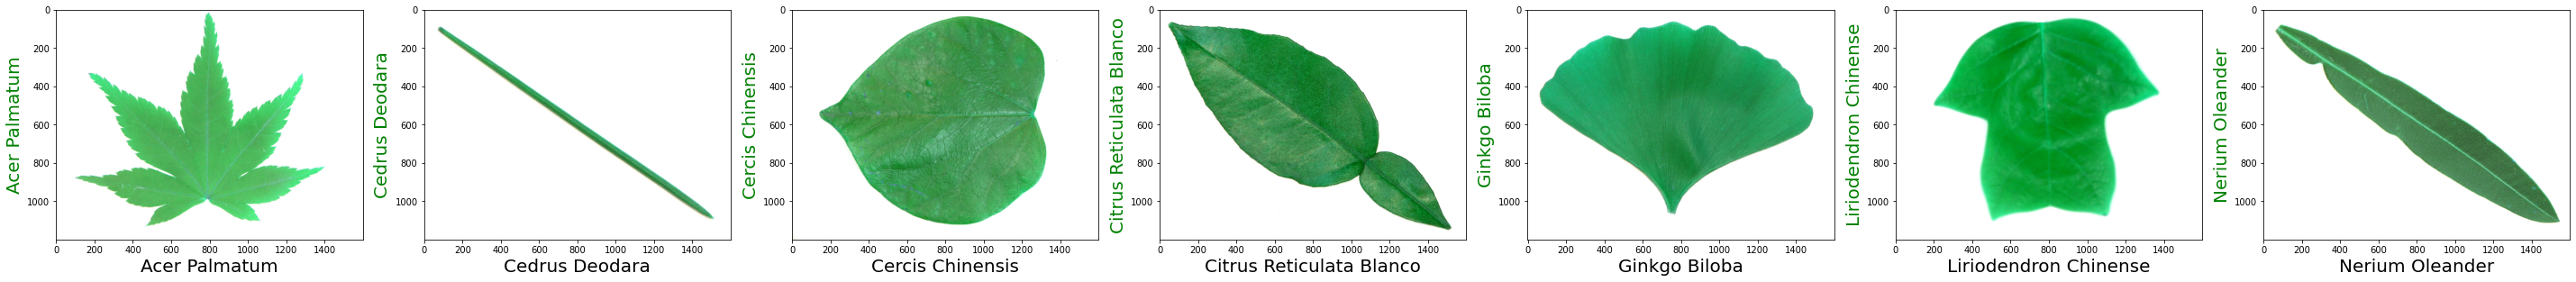

In [ ]:
path1 = '/content/leafImages/test/Acer Palmatum/1318.jpg'
path2 = '/content/leafImages/test/Cedrus Deodara/2397.jpg'
path3 = '/content/leafImages/test/Cercis Chinensis/1173.jpg'
path4 = '/content/leafImages/test/Citrus Reticulata Blanco/3616.jpg'
path5 = '/content/leafImages/test/Ginkgo Biloba/2474.jpg'
path6 = '/content/leafImages/test/Liriodendron Chinense/3561.jpg'
path7 = '/content/leafImages/test/Nerium Oleander/2597.jpg'

img = []

img.append(path1)
img.append(path2)
img.append(path3)
img.append(path4)
img.append(path5)
img.append(path6)
img.append(path7)

res = ['Acer Palmatum', 'Cedrus Deodara', 'Cercis Chinensis', 'Citrus Reticulata Blanco', 'Ginkgo Biloba', 'Liriodendron Chinense', 'Nerium Oleander']
fig = plt.figure(figsize = (50, 50))
rows = 1
columns = 7
for i in range(7):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = img[i]
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis = 0)
    result = cnn.predict(test_image,verbose = 0) 

    plt.imshow(Image)
    col = 'green' if res[i] == labels[np.argmax(result)] else 'red'
    plt.xlabel(res[i], fontsize = 20)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 20)

#Training and Validation Accuracy Plot#

[]

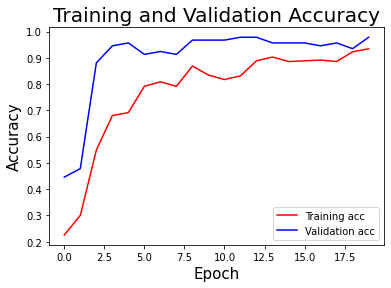

In [ ]:
acc = classifier.history['accuracy']
val_acc = classifier.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 15) 
plt.xlabel('Epoch', fontsize = 15)
plt.legend(prop = {"size": 10})
plt.plot()

#Training and Validation Loss Plot#

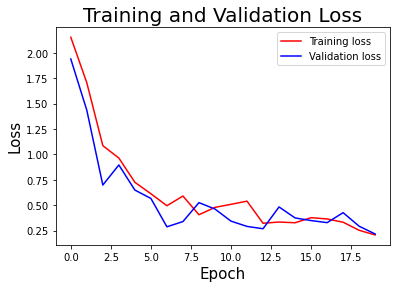

In [ ]:
loss = classifier.history['loss']
val_loss = classifier.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss', fontsize = 20)
plt.ylabel('Loss', fontsize = 15) 
plt.xlabel('Epoch', fontsize = 15)
plt.legend(prop = {"size": 10})
plt.show()


In [ ]:
def plot_confusion_matrix(cm, classes, normalize = True, title = 'Confusion matrix', cmap = plt.cm.Blues):
    plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 10)
    plt.yticks(tick_marks, classes, fontsize = 10)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        cm = np.around(cm, decimals = 2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 20)
    plt.xlabel('Predicted Label', fontsize = 20)

#Confussion Matrix of Test Images#

Confusion Matrix
Normalized confusion matrix


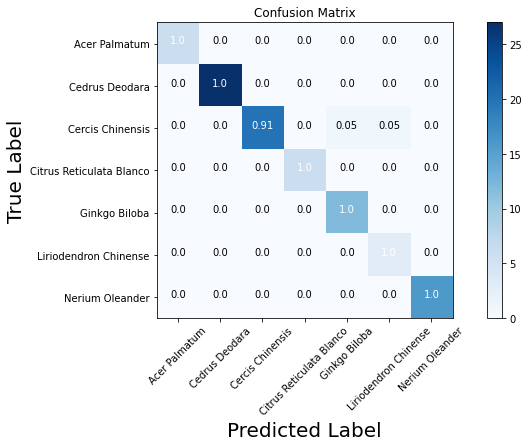

In [ ]:
target_names = []
for key,value in labels.items():
    target_names.append(value)

Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, target_names, title = 'Confusion Matrix')

#Classification Report of Test Images#

In [ ]:
print('                                 Classification Report')
print()
print(classification_report(test_set.classes, y_pred, target_names = target_names))

                                 Classification Report

                          precision    recall  f1-score   support

           Acer Palmatum       1.00      1.00      1.00         6
          Cedrus Deodara       1.00      1.00      1.00        27
        Cercis Chinensis       1.00      0.91      0.95        22
Citrus Reticulata Blanco       1.00      1.00      1.00         6
           Ginkgo Biloba       0.92      1.00      0.96        12
   Liriodendron Chinense       0.75      1.00      0.86         3
         Nerium Oleander       1.00      1.00      1.00        16

                accuracy                           0.98        92
               macro avg       0.95      0.99      0.97        92
            weighted avg       0.98      0.98      0.98        92



#Final Prediction for Acer Palmatum#

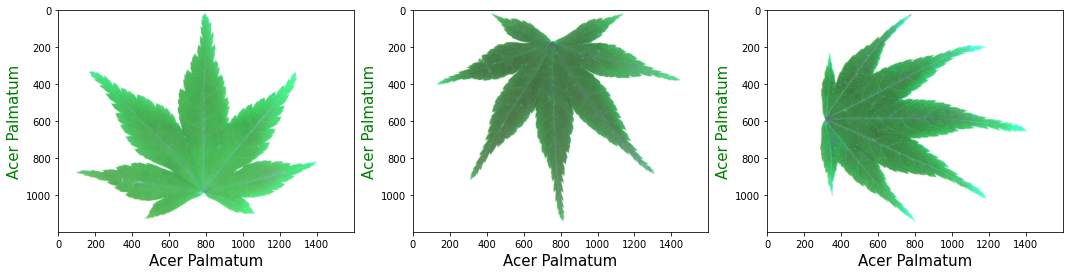

In [ ]:
count = 1

fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Acer Palmatum/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size=(256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[0] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[0], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Cedrus Deodara#

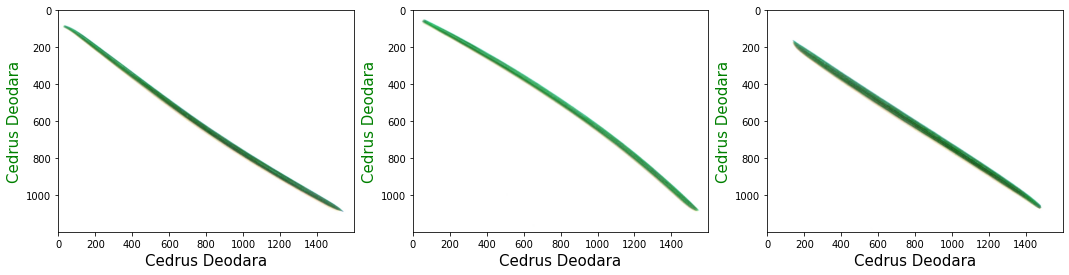

In [ ]:
fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Cedrus Deodara/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[1] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[1], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Cercis Chinensis#

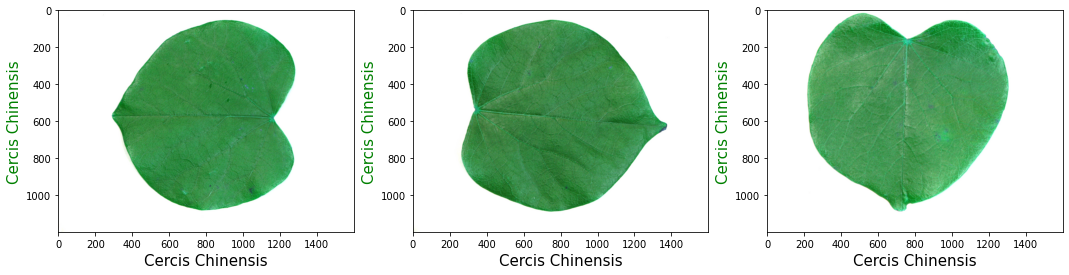

In [ ]:
fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Cercis Chinensis/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[2] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[2], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Citrus Reticulata Balanco#

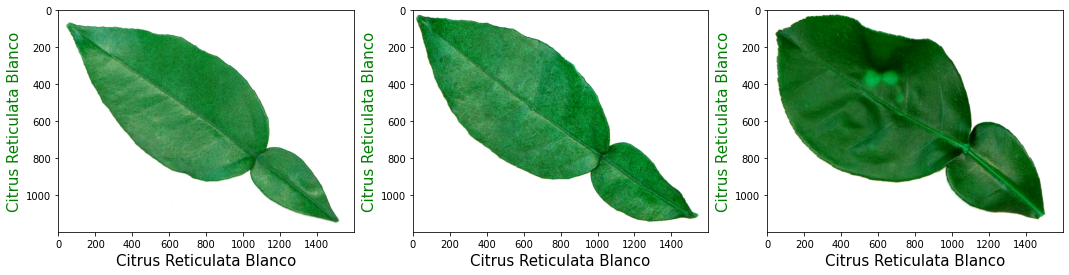

In [ ]:
fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Citrus Reticulata Blanco/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[3] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[3], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Ginkgo Biloba#

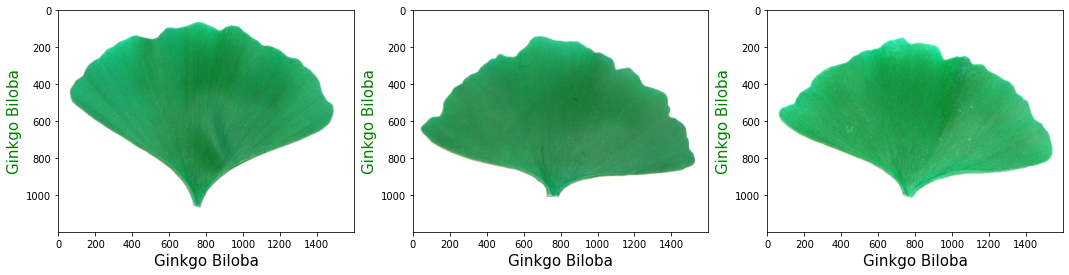

In [ ]:
fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Ginkgo Biloba/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[4] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[4], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Liriodendron Chinense#

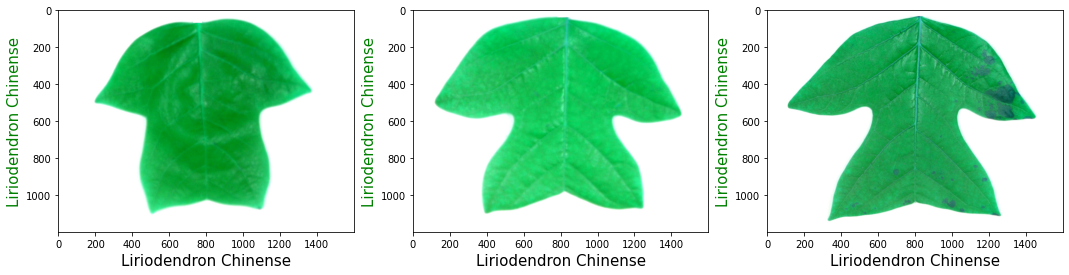

In [ ]:
fig = plt.figure(figsize = (18, 10))
rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Liriodendron Chinense/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[5] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[5], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Final Prediction for Nerium Oleander#

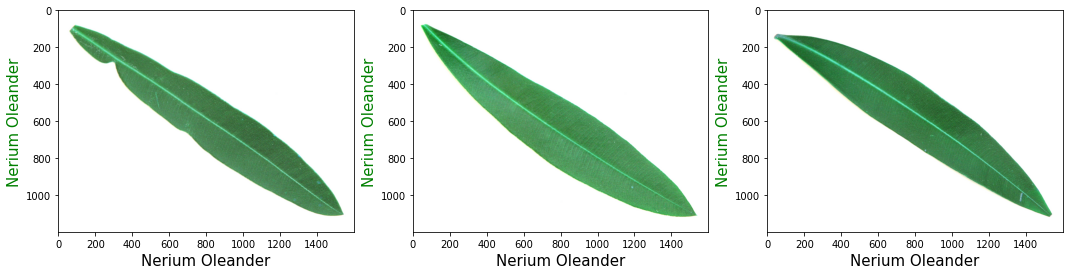

In [ ]:
fig = plt.figure(figsize = (18, 10))

rows = 1
columns = 3
for i in range(3):
    fig.add_subplot(rows, columns, i+1)
    ImagePath = '/content/leafImages/predict/Nerium Oleander/' + str(count) + '.jpg'
    count += 1
    Image = cv2.imread(ImagePath)
    test_image = image.load_img(ImagePath,target_size = (256, 256))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image, verbose = 0)

    plt.imshow(Image)
    col = 'green' if labels[6] == labels[np.argmax(result)] else 'red'
    plt.xlabel(labels[6], fontsize = 15)
    plt.ylabel(labels[np.argmax(result)], color = col, fontsize = 15)



#Confussion Matrix of Predicted Images#

Confusion Matrix
Normalized confusion matrix


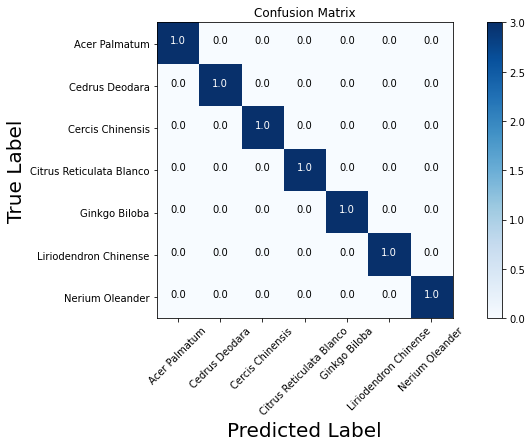

In [ ]:
target_names = []
for key,value in labels.items():
    target_names.append(value)

Y_pred = cnn.predict(predict_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(predict_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title = 'Confusion Matrix')

#Classification Report of Predict Images#

In [ ]:
print('                                 Classification Report')
print()
print(classification_report(predict_generator.classes, y_pred, target_names = target_names))

                                 Classification Report

                          precision    recall  f1-score   support

           Acer Palmatum       1.00      1.00      1.00         3
          Cedrus Deodara       1.00      1.00      1.00         3
        Cercis Chinensis       1.00      1.00      1.00         3
Citrus Reticulata Blanco       1.00      1.00      1.00         3
           Ginkgo Biloba       1.00      1.00      1.00         3
   Liriodendron Chinense       1.00      1.00      1.00         3
         Nerium Oleander       1.00      1.00      1.00         3

                accuracy                           1.00        21
               macro avg       1.00      1.00      1.00        21
            weighted avg       1.00      1.00      1.00        21

